In [3]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./Ficheiros/train.csv")

In [38]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095


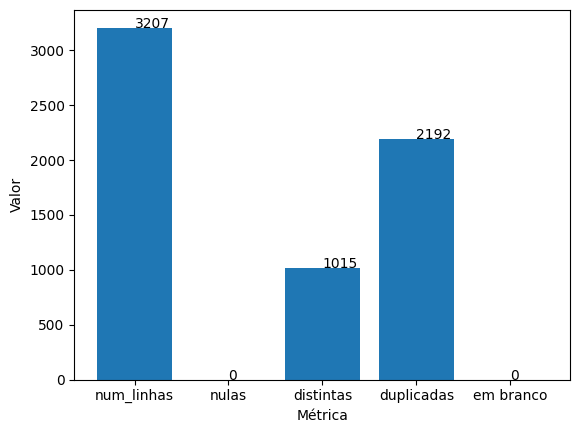

In [39]:
data = [
    df.shape[0],
    df["engine"].isnull().sum(),
    df["engine"].nunique(),
    df["engine"].duplicated().sum(),
    df["engine"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

Podemos verificar que existe uma grande diversidade de motores, apesar de varios serem semelhantes

In [40]:
df['engine'].value_counts()[:10]


engine
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             43
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             42
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    39
2.0L I4 16V GDI DOHC Turbo                               39
–                                                        38
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel            35
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             35
5.7L V8 16V MPFI OHV                                     25
3.6L V6 24V GDI DOHC                                     23
268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            22
Name: count, dtype: int64

Podemos verificar que existem diversos veiculos com motores semelhantes, sendo os motores mais comuns os... (3 primeiros)

In [31]:
# Obter os 10 valores mais frequentes
df['engine'].value_counts().tail(20)

engine
305.0HP 3.6L V6 Cylinder Engine Flex Fuel Capability             1
3.8L V6 12V MPFI OHV                                             1
305.0HP 3.6L V6 Cylinder Engine Gasoline/Mild Electric Hybrid    1
219.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid               1
473.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel            1
290.0HP 4.3L 8 Cylinder Engine Gasoline Fuel                     1
294.0HP 4.2L 8 Cylinder Engine Gasoline Fuel                     1
215.0HP 2.5L Straight 6 Cylinder Engine Gasoline Fuel            1
400.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                    1
265.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                    1
156.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid               1
180.0HP 3.4L V6 Cylinder Engine Gasoline Fuel                    1
2L I-4 DOHC, D-CVVT variable valve control, engine with 147HP    1
152.0HP 3.0L V6 Cylinder Engine Flex Fuel Capability             1
3.0 Liter DOHC Turbo                                   

Podemos também verificar que existem motores que são unicos de cada carro

In [32]:
df['engine'].str.split(' ',expand = True)

,0,1,2,3,4,5,6,7,8,9
0,285.0HP,3.6L,V6,Cylinder,Engine,Gasoline,Fuel,None,None,None
1,270.0HP,3.5L,V6,Cylinder,Engine,Gasoline,Fuel,None,None,None
2,208.0HP,2.5L,4,Cylinder,Engine,Gas/Electric,Hybrid,None,None,None
3,260.0HP,2.4L,4,Cylinder,Engine,Gasoline,Fuel,None,None,None
4,301.0HP,4.6L,8,Cylinder,Engine,Gasoline,Fuel,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3202,220.0HP,2.0L,4,Cylinder,Engine,Flex,Fuel,Capability,None,None
3203,429.0HP,4.7L,8,Cylinder,Engine,Gasoline,Fuel,None,None,None
3204,420.0HP,6.2L,8,Cylinder,Engine,Gasoline,Fuel,None,None,None
3205,2.0L,I4,16V,GDI,DOHC,Turbo,None,None,None,None


Através da tabela acima podemos verificar que em cada motor podemos obetr diversas especificaçoes deste.
Cavalos - separar em String que tem HP
Litros - separar String que contem L
Nº Cilindtos - separar string antes de Cylinder

In [33]:
hp = df['engine'].apply(lambda x : x.split('HP')[0]).apply(pd.to_numeric, errors='coerce')

In [34]:
litres = df['engine'].apply(lambda x : x.split('L')[0].split(' ')[-1]).apply(pd.to_numeric, errors='coerce')

In [35]:
df2 = df
df2.insert(6,"HP",hp)
df2.insert(7,"Liters",litres)

In [36]:
df2.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
HP              629
Liters          317
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64